# NETWORK MONITORING AI TEST

In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls ../data

app_stats.log	 dns.log	 http.log.gz	      top_domains_1k.csv
conn.log	 files.log	 intel_example.intel  tor_ssl.log
dhcp_002.log	 ftp.log	 json		      weird.log
dhcp_002.log.gz  fullTest	 notice.log	      x509.log
dhcp.log	 http_empty.log  smtp.log
dhcp.log.gz	 http.log	 ssl.log


In [3]:
!head ../data/conn.log

#separator \x09
#set_separator	,
#empty_field	(empty)
#unset_field	-
#path	conn
#open	2014-04-03-10-08-27
#fields	ts	uid	id.orig_h	id.orig_p	id.resp_h	id.resp_p	proto	service	duration	orig_bytes	resp_bytes	conn_state	local_orig	missed_bytes	history	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes	tunnel_parents
#types	time	string	addr	port	addr	port	enum	string	interval	count	count	string	bool	count	string	count	count	count	count	table[string]
1379288667.706265	CoyZrY2g74UvMMgp4a	192.168.33.10	1032	54.245.228.191	80	tcp	http	0.447460	601	38393	RSTO	-	0	ShADadR	22	1489	31	39641	(empty)
1379288668.093470	CaJxA82D4HGxRzEgjc	192.168.33.10	1039	54.245.228.191	80	tcp	http	0.116953	311	14886	RSTO	-	0	ShADadR	11	759	13	15414	(empty)


In [4]:
!head ../data/json/conn.log

{"ts":1575413096.052279,"uid":"CH53301MTU21BMj2Bj","id.orig_h":"10.18.20.97","id.orig_p":49187,"id.resp_h":"10.18.20.8","id.resp_p":88,"proto":"tcp","service":"krb_tcp","duration":0.0012309551239013672,"orig_bytes":242,"resp_bytes":283,"conn_state":"RSTR","missed_bytes":0,"history":"ShADdFar","orig_pkts":4,"orig_ip_bytes":414,"resp_pkts":4,"resp_ip_bytes":455}
{"ts":1575413096.068448,"uid":"CdtRb5LBRtPXEsGik","id.orig_h":"10.18.20.97","id.orig_p":49188,"id.resp_h":"10.18.20.8","id.resp_p":88,"proto":"tcp","service":"krb_tcp","duration":0.0013108253479003907,"orig_bytes":322,"resp_bytes":1603,"conn_state":"RSTR","missed_bytes":0,"history":"ShADdFar","orig_pkts":5,"orig_ip_bytes":534,"resp_pkts":5,"resp_ip_bytes":1815}
{"ts":1575413096.070253,"uid":"C3inT24bBCy7ofArEd","id.orig_h":"10.18.20.97","id.orig_p":49189,"id.resp_h":"10.18.20.8","id.resp_p":88,"proto":"tcp","service":"krb_tcp","duration":0.001316070556640625,"orig_bytes":1574,"resp_bytes":1540,"conn_state":"RSTR","missed_bytes":0

In [5]:
from zat import zeek_log_reader # it will import as python dict type

In [6]:
reader = zeek_log_reader.ZeekLogReader('../data/json/conn.log')

In [7]:
# Show reader index 0
# Count of lines are only 50
counter =0
for i in reader.readlines():
    print(i)
    counter+=1
    if counter ==5:
        break
print(counter)

{"ts":1575413096.052279,"uid":"CH53301MTU21BMj2Bj","id.orig_h":"10.18.20.97","id.orig_p":49187,"id.resp_h":"10.18.20.8","id.resp_p":88,"proto":"tcp","service":"krb_tcp","duration":0.0012309551239013672,"orig_bytes":242,"resp_bytes":283,"conn_state":"RSTR","missed_bytes":0,"history":"ShADdFar","orig_pkts":4,"orig_ip_bytes":414,"resp_pkts":4,"resp_ip_bytes":455}

{"ts":1575413096.068448,"uid":"CdtRb5LBRtPXEsGik","id.orig_h":"10.18.20.97","id.orig_p":49188,"id.resp_h":"10.18.20.8","id.resp_p":88,"proto":"tcp","service":"krb_tcp","duration":0.0013108253479003907,"orig_bytes":322,"resp_bytes":1603,"conn_state":"RSTR","missed_bytes":0,"history":"ShADdFar","orig_pkts":5,"orig_ip_bytes":534,"resp_pkts":5,"resp_ip_bytes":1815}

{"ts":1575413096.070253,"uid":"C3inT24bBCy7ofArEd","id.orig_h":"10.18.20.97","id.orig_p":49189,"id.resp_h":"10.18.20.8","id.resp_p":88,"proto":"tcp","service":"krb_tcp","duration":0.001316070556640625,"orig_bytes":1574,"resp_bytes":1540,"conn_state":"RSTR","missed_bytes"

In [8]:
# Convert Zeek log to pandas Dataframe

In [9]:
from zat.log_to_dataframe import LogToDataFrame


In [10]:
log_to_df = LogToDataFrame()

In [11]:
zeek_df = log_to_df.create_dataframe('../data/conn.log')


In [12]:
from zat.json_log_to_dataframe import JSONLogToDataFrame
json_log_to_df =JSONLogToDataFrame()

In [13]:
zeek_df_json = json_log_to_df.create_dataframe('../data/json/conn.log')

In [14]:
zeek_df_json.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
ts,,,,,,,,,,,,,,,,,
2019-12-03 22:44:56.052279040,CH53301MTU21BMj2Bj,10.18.20.97,49187,10.18.20.8,88,tcp,krb_tcp,0.001231,242,283,RSTR,0,ShADdFar,4,414,4,455
2019-12-03 22:44:56.068448000,CdtRb5LBRtPXEsGik,10.18.20.97,49188,10.18.20.8,88,tcp,krb_tcp,0.001311,322,1603,RSTR,0,ShADdFar,5,534,5,1815
2019-12-03 22:44:56.070252800,C3inT24bBCy7ofArEd,10.18.20.97,49189,10.18.20.8,88,tcp,krb_tcp,0.001316,1574,1540,RSTR,0,ShADadFr,6,1826,6,1792
2019-12-03 22:44:56.046471168,CMjeUw2gIHIKi7d1l,10.18.20.97,49186,10.18.20.8,389,tcp,NaN,0.027741,2949,474,RSTR,0,ShADadr,7,3241,6,726
2019-12-03 22:44:56.035613184,CXT2XBVBBqwWHrj4d,10.18.20.97,49185,10.18.20.8,389,tcp,NaN,0.038841,2782,3193,RSTR,0,ShADdar,11,3234,10,3605


In [15]:
zeek_df_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2019-12-03 22:44:56.052279040 to 2019-12-03 22:46:04.247293952
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            50 non-null     object 
 1   id.orig_h      50 non-null     object 
 2   id.orig_p      50 non-null     int64  
 3   id.resp_h      50 non-null     object 
 4   id.resp_p      50 non-null     int64  
 5   proto          50 non-null     object 
 6   service        44 non-null     object 
 7   duration       50 non-null     float64
 8   orig_bytes     50 non-null     int64  
 9   resp_bytes     50 non-null     int64  
 10  conn_state     50 non-null     object 
 11  missed_bytes   50 non-null     int64  
 12  history        50 non-null     object 
 13  orig_pkts      50 non-null     int64  
 14  orig_ip_bytes  50 non-null     int64  
 15  resp_pkts      50 non-null     int64  
 16  resp_ip_bytes  50 non-null     int64  
dty

In [16]:
zeek_df_json['id.orig_h'].unique() #gets unique ips in conn logs

array(['10.18.20.97'], dtype=object)

In [17]:
zeek_df_json['id.orig_p'].unique()
# Gets unique port for each host

array([49187, 49188, 49189, 49186, 49185, 49161, 49156, 49155, 49190,
       49191, 49192, 49194, 49196, 49197, 49199, 49200, 49198, 49180,
       59102, 53522, 52634, 62941, 49193, 49206, 49207, 49210, 63849,
       49201, 57937, 63013, 62613, 59748, 57621, 63874, 59279, 50702,
       61598, 52900, 63690, 55634, 59976, 49244, 60225, 49658, 49423,
       52091, 56275, 59553, 54089, 54576])

In [18]:
grIP=zeek_df_json.groupby(by=['id.orig_h'],group_keys=True).apply(lambda x: x)
# Group by ip
grIP.head()

uid    id.orig_h  \
id.orig_h   ts                                                               
10.18.20.97 2019-12-03 22:44:56.052279040  CH53301MTU21BMj2Bj  10.18.20.97   
            2019-12-03 22:44:56.068448000   CdtRb5LBRtPXEsGik  10.18.20.97   
            2019-12-03 22:44:56.070252800  C3inT24bBCy7ofArEd  10.18.20.97   
            2019-12-03 22:44:56.046471168   CMjeUw2gIHIKi7d1l  10.18.20.97   
            2019-12-03 22:44:56.035613184   CXT2XBVBBqwWHrj4d  10.18.20.97   

                                           id.orig_p   id.resp_h  id.resp_p  \
id.orig_h   ts                                                                
10.18.20.97 2019-12-03 22:44:56.052279040      49187  10.18.20.8         88   
            2019-12-03 22:44:56.068448000      49188  10.18.20.8         88   
            2019-12-03 22:44:56.070252800      49189  10.18.20.8         88   
            2019-12-03 22:44:56.046471168      49186  10.18.20.8        389   
            2019-12-03 22:44:56.035613184      49185  10.18.20.8        389   

                                          proto  service  duration  \
id.orig_h   ts                                                       
10.18.20.97 2019-12-03 22:44:56.052279040   tcp  krb_tcp  0.001231   
            2019-12-03 22:44:56.068448000   tcp  krb_tcp  0.001311   
            2019-12-03 22:44:56.070252800   tcp  krb_tcp  0.001316   
            2019-12-03 22:44:56.046471168   tcp      NaN  0.027741   
            2019-12-03 22:44:56.035613184   tcp      NaN  0.038841   

                                           orig_bytes  resp_bytes conn_state  \
id.orig_h   ts                                                                 
10.18.20.97 2019-12-03 22:44:56.052279040         242         283       RSTR   
            2019-12-03 22:44:56.068448000         322        1603       RSTR   
            2019-12-03 22:44:56.070252800        1574        1540       RSTR   
            2019-12-03 22:44:56.046471168        2949         474       RSTR   
            2019-12-03 22:44:56.035613184        2782        3193       RSTR   

                                           missed_bytes   history  orig_pkts  \
id.orig_h   ts                                                                 
10.18.20.97 2019-12-03 22:44:56.052279040             0  ShADdFar          4   
            2019-12-03 22:44:56.068448000             0  ShADdFar          5   
            2019-12-03 22:44:56.070252800             0  ShADadFr          6   
            2019-12-03 22:44:56.046471168             0   ShADadr          7   
            2019-12-03 22:44:56.035613184             0   ShADdar         11   

                                           orig_ip_bytes  resp_pkts  \
id.orig_h   ts                                                        
10.18.20.97 2019-12-03 22:44:56.052279040            414          4   
            2019-12-03 22:44:56.068448000            534          5   
            2019-12-03 22:44:56.070252800           1826          6   
            2019-12-03 22:44:56.046471168           3241          6   
            2019-12-03 22:44:56.035613184           3234         10   

                                           resp_ip_bytes  
id.orig_h   ts                                            
10.18.20.97 2019-12-03 22:44:56.052279040            455  
            2019-12-03 22:44:56.068448000           1815  
            2019-12-03 22:44:56.070252800           1792  
            2019-12-03 22:44:56.046471168            726  
            2019-12-03 22:44:56.035613184           3605

In [19]:
#zeek_df_json[zeek_df_json['id.orig_h'] == '10.18.20.97']

In [20]:
zeek_df_json.loc[(zeek_df_json['id.orig_h'] == '10.18.20.97') & (zeek_df_json['id.orig_p']==49187)]
# query ip and port 

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
ts,,,,,,,,,,,,,,,,,
2019-12-03 22:44:56.052279040,CH53301MTU21BMj2Bj,10.18.20.97,49187,10.18.20.8,88,tcp,krb_tcp,0.001231,242,283,RSTR,0,ShADdFar,4,414,4,455


In [21]:
# DNS 

In [22]:
from zat.log_to_dataframe import LogToDataFrame
from zat.json_log_to_dataframe import JSONLogToDataFrame

In [23]:
log_to_df = LogToDataFrame()
json_log_to_df = JSONLogToDataFrame()

In [24]:
zeek_df = log_to_df.create_dataframe('../data/dns.log')

In [25]:
zeek_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2013-09-15 23:44:27.631939840 to 2013-09-15 23:48:07.897020928
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   uid          54 non-null     object  
 1   id.orig_h    54 non-null     category
 2   id.orig_p    54 non-null     UInt16  
 3   id.resp_h    54 non-null     category
 4   id.resp_p    54 non-null     UInt16  
 5   proto        54 non-null     category
 6   trans_id     54 non-null     UInt64  
 7   query        51 non-null     category
 8   qclass       51 non-null     UInt64  
 9   qclass_name  51 non-null     category
 10  qtype        51 non-null     UInt64  
 11  qtype_name   51 non-null     category
 12  rcode        51 non-null     UInt64  
 13  rcode_name   51 non-null     category
 14  AA           54 non-null     category
 15  TC           54 non-null     category
 16  RD           54 non-null     category
 17  RA           54 n

In [26]:
zeek_df_json =json_log_to_df.create_dataframe('../data/json/dns.log')

In [27]:
zeek_df_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2019-12-03 22:45:22.764316928 to 2019-12-03 22:47:27.024624128
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          50 non-null     object 
 1   id.orig_h    50 non-null     object 
 2   id.orig_p    50 non-null     int64  
 3   id.resp_h    50 non-null     object 
 4   id.resp_p    50 non-null     int64  
 5   proto        50 non-null     object 
 6   trans_id     50 non-null     int64  
 7   query        50 non-null     object 
 8   qclass       50 non-null     int64  
 9   qclass_name  50 non-null     object 
 10  qtype        50 non-null     int64  
 11  qtype_name   50 non-null     object 
 12  rcode        44 non-null     float64
 13  rcode_name   44 non-null     object 
 14  AA           50 non-null     bool   
 15  TC           50 non-null     bool   
 16  RD           50 non-null     bool   
 17  RA           50 non-null     bool   

In [28]:
zeek_df_json.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,query,qclass,qclass_name,...,rcode_name,AA,TC,RD,RA,Z,rejected,rtt,answers,TTLs
ts,,,,,,,,,,,,,,,,,,,,,
2019-12-03 22:45:22.764316928,CWwU9s3h33kFsa9Ljg,10.18.20.97,59102,10.18.20.8,53,udp,19084,_ldap._tcp.default-first-site-name._sites.icem...,1,C_INTERNET,...,NXDOMAIN,False,False,True,False,0,False,NaN,NaN,NaN
2019-12-03 22:45:22.765074944,CUNQPmoPJo8BiTxSa,10.18.20.97,53522,10.18.20.8,53,udp,32754,_ldap._tcp.icemaiden-dc.icemaiden.com,1,C_INTERNET,...,NXDOMAIN,False,False,True,False,0,False,NaN,NaN,NaN
2019-12-03 22:45:23.292845056,CzaqP91edb9woeU409,10.18.20.97,52634,10.18.20.8,53,udp,19985,dns.msftncsi.com,1,C_INTERNET,...,NOERROR,False,False,True,True,0,False,0.059601,[131.107.255.255],[17.0]
2019-12-03 22:45:23.353131008,CptEJb4QtTMPEarI9a,10.18.20.97,62941,10.18.20.8,53,udp,39214,dns.msftncsi.com,1,C_INTERNET,...,NOERROR,False,False,True,True,0,False,0.058880,[fd3e:4f5a:5b81::1],[2534.0]
2019-12-03 22:45:55.172787968,CWP63gBdGQXUvZe7f,10.18.20.97,63849,10.18.20.8,53,udp,38266,mail.aol.com,1,C_INTERNET,...,NOERROR,False,False,True,True,0,False,0.054906,"[geoycpi-uno.gycpi.b.yahoodns.net, 69.147.64.3...","[22.0, 274.0, 274.0]"


In [29]:
# TEST CENTER LOGS


In [30]:
testcenterdns =json_log_to_df.create_dataframe('../data/fullTest/pcap/dns.log')

In [31]:
testcenterdns.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,...,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected
ts,,,,,,,,,,,,,,,,,,,,,
2022-08-25 13:52:11.358944000,C1HN4t2IH9yCAo5uI6,10.154.13.30,54792,193.140.253.2,53,udp,51878,0.00237,g.live.com,1.0,...,0.0,NOERROR,False,False,True,True,0,"[g.msn.com, g-msn-com-nsatc.trafficmanager.net...","[98.0, 196.0, 52.0]",False
2022-08-25 13:52:11.358944000,C1HN4t2IH9yCAo5uI6,10.154.13.30,54792,193.140.253.2,53,udp,51878,0.00237,g.live.com,1.0,...,0.0,NOERROR,False,False,True,True,0,"[g.msn.com, g-msn-com-nsatc.trafficmanager.net...","[98.0, 196.0, 52.0]",False
2022-08-25 13:52:11.358944000,C1HN4t2IH9yCAo5uI6,10.154.13.30,54792,193.140.253.2,53,udp,51878,0.00237,g.live.com,1.0,...,0.0,NOERROR,False,False,True,True,0,"[g.msn.com, g-msn-com-nsatc.trafficmanager.net...","[98.0, 196.0, 52.0]",False
2022-08-25 13:52:11.333390080,CDqg9o3BicBxnFAx4k,10.154.13.30,54792,10.10.30.46,53,udp,51878,NaN,g.live.com,1.0,...,2.0,SERVFAIL,False,False,True,False,0,NaN,NaN,True
2022-08-25 13:52:11.333390080,CDqg9o3BicBxnFAx4k,10.154.13.30,54792,10.10.30.46,53,udp,51878,NaN,g.live.com,1.0,...,2.0,SERVFAIL,False,False,True,False,0,NaN,NaN,True


In [32]:
testcenterdns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40664 entries, 2022-08-25 13:52:11.358944 to 2022-08-25 14:42:47.727369984
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          40664 non-null  object 
 1   id.orig_h    40664 non-null  object 
 2   id.orig_p    40664 non-null  int64  
 3   id.resp_h    40664 non-null  object 
 4   id.resp_p    40664 non-null  int64  
 5   proto        40664 non-null  object 
 6   trans_id     40664 non-null  int64  
 7   rtt          1412 non-null   float64
 8   query        40585 non-null  object 
 9   qclass       40503 non-null  float64
 10  qclass_name  40503 non-null  object 
 11  qtype        40503 non-null  float64
 12  qtype_name   40503 non-null  object 
 13  rcode        3046 non-null   float64
 14  rcode_name   3046 non-null   object 
 15  AA           40664 non-null  bool   
 16  TC           40664 non-null  bool   
 17  RD           40664 non-null  bool   

In [33]:
#whitelisting for test center dns


In [34]:
white_df = pd.read_csv('../data/top_domains_1k.csv', names=['rank', 'domain'])
whitelist = white_df['domain'].tolist()

In [35]:
print(white_df)
#print(whitelist)

     rank                  domain
0       1              google.com
1       2           microsoft.com
2       3          www.google.com
3       4      data.microsoft.com
4       5            facebook.com
..    ...                     ...
995   996        tribalfusion.com
996   997              aliyun.com
997   998    imapi-16.tiktokv.com
998   999     image2.pubmatic.com
999  1000  2.android.pool.ntp.org

[1000 rows x 2 columns]


In [36]:
testcenterdns['query'].unique() # all unique dns queries for test center

array(['g.live.com', 'atomapi.com', 'oneclient.sfx.ms',
       'play.googleapis.com', 'self.events.data.microsoft.com',
       'graph.microsoft.com', 'slscr.update.microsoft.com',
       'login.live.com', 'maps.windows.com',
       'storecatalogrevocation.storequality.microsoft.com',
       'ocsp.digicert.com', nan, 'crl3.digicert.com',
       'egw1.express.gotoassist.com', 'config.mycloud.com',
       'atomapi.com.localdomain', 'push.services.mozilla.com',
       'firefox.settings.services.mozilla.com', '1.debian.pool.ntp.org',
       'chk.l2.nessus.org', '21.13.154.10.in-addr.arpa',
       '20.13.154.10.in-addr.arpa', '23.13.154.10.in-addr.arpa',
       '22.13.154.10.in-addr.arpa', '24.13.154.10.in-addr.arpa',
       '29.13.154.10.in-addr.arpa', '26.13.154.10.in-addr.arpa',
       '25.13.154.10.in-addr.arpa', '28.13.154.10.in-addr.arpa',
       '27.13.154.10.in-addr.arpa', 'kernel.ubuntu.com',
       '_ldap._tcp.default-first-site-name._sites.dc._msdcs.sauenergy.local',
       '_ldap

In [37]:
# filterout whitelist from dns queries
testcenterdnsfiltered = testcenterdns[~testcenterdns['query'].isin(whitelist)]

In [38]:
testcenterdnsfiltered.groupby(by='uid',group_keys=True).apply(lambda x :x)
# UID ==> These are unique identifiers assigned by Zeek that we will use to track related activity in other transaction logs.
# Can be used for detecting local machines and attackers

uid  \
uid                ts                                                  
C00Zkw3muVhuttGIP9 2022-08-25 13:59:39.050484992  C00Zkw3muVhuttGIP9   
                   2022-08-25 13:59:39.050484992  C00Zkw3muVhuttGIP9   
                   2022-08-25 13:59:43.058496000  C00Zkw3muVhuttGIP9   
                   2022-08-25 13:59:43.058496000  C00Zkw3muVhuttGIP9   
C01D2j4Yqtwyi5F4a  2022-08-25 14:25:34.160915968   C01D2j4Yqtwyi5F4a   
...                                                              ...   
Czzxu14LvEYx00XAS4 2022-08-25 14:16:52.114438144  Czzxu14LvEYx00XAS4   
                   2022-08-25 14:16:52.114438144  Czzxu14LvEYx00XAS4   
                   2022-08-25 14:16:52.114438144  Czzxu14LvEYx00XAS4   
                   2022-08-25 14:16:52.114438144  Czzxu14LvEYx00XAS4   
                   2022-08-25 14:16:52.114438144  Czzxu14LvEYx00XAS4   

                                                      id.orig_h  id.orig_p  \
uid                ts                                                        
C00Zkw3muVhuttGIP9 2022-08-25 13:59:39.050484992  10.154.13.134      56797   
                   2022-08-25 13:59:39.050484992  10.154.13.134      56797   
                   2022-08-25 13:59:43.058496000  10.154.13.134      56797   
                   2022-08-25 13:59:43.058496000  10.154.13.134      56797   
C01D2j4Yqtwyi5F4a  2022-08-25 14:25:34.160915968    10.10.42.60      54916   
...                                                         ...        ...   
Czzxu14LvEYx00XAS4 2022-08-25 14:16:52.114438144   10.154.13.88       5353   
                   2022-08-25 14:16:52.114438144   10.154.13.88       5353   
                   2022-08-25 14:16:52.114438144   10.154.13.88       5353   
                   2022-08-25 14:16:52.114438144   10.154.13.88       5353   
                   2022-08-25 14:16:52.114438144   10.154.13.88       5353   

                                                    id.resp_h  id.resp_p  \
uid                ts                                                      
C00Zkw3muVhuttGIP9 2022-08-25 13:59:39.050484992      8.8.8.8         53   
                   2022-08-25 13:59:39.050484992      8.8.8.8         53   
                   2022-08-25 13:59:43.058496000      8.8.8.8         53   
                   2022-08-25 13:59:43.058496000      8.8.8.8         53   
C01D2j4Yqtwyi5F4a  2022-08-25 14:25:34.160915968  10.10.30.46         53   
...                                                       ...        ...   
Czzxu14LvEYx00XAS4 2022-08-25 14:16:52.114438144  224.0.0.251       5353   
                   2022-08-25 14:16:52.114438144  224.0.0.251       5353   
                   2022-08-25 14:16:52.114438144  224.0.0.251       5353   
                   2022-08-25 14:16:52.114438144  224.0.0.251       5353   
                   2022-08-25 14:16:52.114438144  224.0.0.251       5353   

                                                 proto  trans_id  rtt  \
uid                ts                                                   
C00Zkw3muVhuttGIP9 2022-08-25 13:59:39.050484992   udp     52278  NaN   
                   2022-08-25 13:59:39.050484992   udp     52278  NaN   
                   2022-08-25 13:59:43.058496000   udp     52278  NaN   
                   2022-08-25 13:59:43.058496000   udp     52278  NaN   
C01D2j4Yqtwyi5F4a  2022-08-25 14:25:34.160915968   udp     56585  NaN   
...                                                ...       ...  ...   
Czzxu14LvEYx00XAS4 2022-08-25 14:16:52.114438144   udp         0  NaN   
                   2022-08-25 14:16:52.114438144   udp         0  NaN   
                   2022-08-25 14:16:52.114438144   udp         0  NaN   
                   2022-08-25 14:16:52.114438144   udp         0  NaN   
                   2022-08-25 14:16:52.114438144   udp         0  NaN   

                                                                       query  \
uid                ts                                                          
C00Zkw3muVhutt

In [39]:
# Third Party Imports
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Local imports
import zat
from zat.log_to_dataframe import LogToDataFrame
from zat.dataframe_to_matrix import DataFrameToMatrix
from zat.json_log_to_dataframe import JSONLogToDataFrame

# Good to print out versions of stuff
print('zat: {:s}'.format(zat.__version__))
print('Pandas: {:s}'.format(pd.__version__))
print('Numpy: {:s}'.format(np.__version__))
print('Scikit Learn Version:', sklearn.__version__)


zat: 0.4.4
Pandas: 1.5.1
Numpy: 1.23.4
Scikit Learn Version: 1.1.3


In [40]:
# Create a Pandas dataframe from a Zeek log
log_to_df = LogToDataFrame()
zeek_df = json_log_to_df.create_dataframe('../data/fullTest/pcap/dns.log')

# Print out the head of the dataframe
zeek_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,...,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected
ts,,,,,,,,,,,,,,,,,,,,,
2022-08-25 13:52:11.358944000,C1HN4t2IH9yCAo5uI6,10.154.13.30,54792,193.140.253.2,53,udp,51878,0.00237,g.live.com,1.0,...,0.0,NOERROR,False,False,True,True,0,"[g.msn.com, g-msn-com-nsatc.trafficmanager.net...","[98.0, 196.0, 52.0]",False
2022-08-25 13:52:11.358944000,C1HN4t2IH9yCAo5uI6,10.154.13.30,54792,193.140.253.2,53,udp,51878,0.00237,g.live.com,1.0,...,0.0,NOERROR,False,False,True,True,0,"[g.msn.com, g-msn-com-nsatc.trafficmanager.net...","[98.0, 196.0, 52.0]",False
2022-08-25 13:52:11.358944000,C1HN4t2IH9yCAo5uI6,10.154.13.30,54792,193.140.253.2,53,udp,51878,0.00237,g.live.com,1.0,...,0.0,NOERROR,False,False,True,True,0,"[g.msn.com, g-msn-com-nsatc.trafficmanager.net...","[98.0, 196.0, 52.0]",False
2022-08-25 13:52:11.333390080,CDqg9o3BicBxnFAx4k,10.154.13.30,54792,10.10.30.46,53,udp,51878,NaN,g.live.com,1.0,...,2.0,SERVFAIL,False,False,True,False,0,NaN,NaN,True
2022-08-25 13:52:11.333390080,CDqg9o3BicBxnFAx4k,10.154.13.30,54792,10.10.30.46,53,udp,51878,NaN,g.live.com,1.0,...,2.0,SERVFAIL,False,False,True,False,0,NaN,NaN,True


In [41]:
zeek_df['query_length'] = zeek_df['query'].str.len()

In [42]:
# These are the features we want (note some of these are categorical :)
features = ['AA', 'RA', 'RD', 'TC', 'Z', 'rejected', 'proto', 'qclass_name', 
            'qtype_name', 'rcode_name', 'query_length']
feature_df = zeek_df[features]
feature_df.head()

,AA,RA,RD,TC,Z,rejected,proto,qclass_name,qtype_name,rcode_name,query_length
ts,,,,,,,,,,,
2022-08-25 13:52:11.358944000,False,True,True,False,0,False,udp,C_INTERNET,A,NOERROR,10.0
2022-08-25 13:52:11.358944000,False,True,True,False,0,False,udp,C_INTERNET,A,NOERROR,10.0
2022-08-25 13:52:11.358944000,False,True,True,False,0,False,udp,C_INTERNET,A,NOERROR,10.0
2022-08-25 13:52:11.333390080,False,False,True,False,0,True,udp,C_INTERNET,A,SERVFAIL,10.0
2022-08-25 13:52:11.333390080,False,False,True,False,0,True,udp,C_INTERNET,A,SERVFAIL,10.0


In [43]:
to_matrix = zat.dataframe_to_matrix.DataFrameToMatrix()
zeek_matrix = to_matrix.fit_transform(feature_df)
# TODO: Handle depricated function problem

Changing column proto to category...
Changing column qclass_name to category...
Changing column qtype_name to category...
Changing column rcode_name to category...
Normalizing column Z...
Normalizing column query_length...
Dropping AA column...
Dropping RA column...
Dropping RD column...
Dropping TC column...
Dropping rejected column...


/home/erdem/anaconda3/envs/zat/lib/python3.8/site-packages/zat/dataframe_to_matrix.py:109: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[column].cat.add_categories('NaN', inplace=True)
/home/erdem/anaconda3/envs/zat/lib/python3.8/site-packages/zat/dataframe_to_matrix.py:109: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[column].cat.add_categories('NaN', inplace=True)
/home/erdem/anaconda3/envs/zat/lib/python3.8/site-packages/zat/dataframe_to_matrix.py:109: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[column]

In [44]:
zeek_matrix

array([[0.        , 0.11688311, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11688311, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11688311, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.22077923, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.22077923, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.22077923, 0.        , ..., 0.        , 1.        ,
        0.        ]], dtype=float32)

In [54]:
kmeans = KMeans(n_clusters=10).fit_predict(zeek_matrix)

In [55]:
# T-distributed Stochastic Neighbor Embedding.

In [56]:
projection = TSNE().fit_transform(zeek_matrix)
# TODO: handle warnigns latter

/home/erdem/anaconda3/envs/zat/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/erdem/anaconda3/envs/zat/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [57]:
zeek_df['x'] = projection[:, 0] # Projection X Column
zeek_df['y'] = projection[:, 1] # Projection Y Column

In [58]:
zeek_df['cluster'] = kmeans
zeek_df[['query', 'proto', 'x', 'y', 'cluster']].head() 

,query,proto,x,y,cluster
ts,,,,,
2022-08-25 13:52:11.358944000,g.live.com,udp,16.655813,56.038204,9
2022-08-25 13:52:11.358944000,g.live.com,udp,16.655813,56.038204,9
2022-08-25 13:52:11.358944000,g.live.com,udp,16.655813,56.038204,9
2022-08-25 13:52:11.333390080,g.live.com,udp,27.617897,-48.402225,9
2022-08-25 13:52:11.333390080,g.live.com,udp,27.617897,-48.402225,9


In [59]:
# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18.0
plt.rcParams['figure.figsize'] = 15.0, 7.0

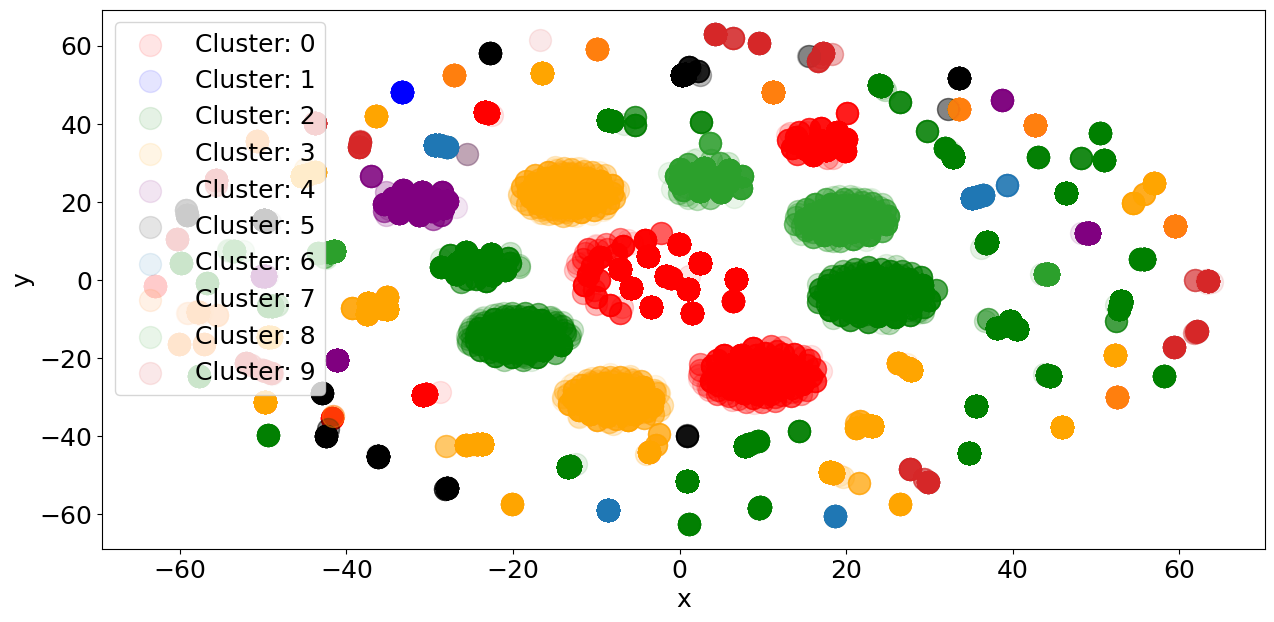

In [62]:
# Now use dataframe group by cluster
cluster_groups = zeek_df.groupby('cluster')

# Plot the Machine Learning results
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'orange', 4:'purple', 5:'black',
         6:'#1f77b4', 7:'#ff7f0e', 8:'#2ca02c',9:'#d62728'}
for key, group in cluster_groups:
    group.plot(ax=ax, kind='scatter', x='x', y='y', alpha=0.1, s=250,
               label='Cluster: {:d}'.format(key), color=colors[key])

In [63]:
# Now print out the details for each cluster
pd.set_option('display.width', 1000)
show_fields = ['query', 'Z', 'proto', 'qtype_name', 'cluster']
for key, group in cluster_groups:
    print('\nCluster {:d}: {:d} observations'.format(key, len(group)))
    print(group[show_fields].head())


Cluster 0: 10812 observations
                                                   query  Z proto qtype_name  cluster
ts                                                                                   
2022-08-25 13:52:26.229883904  21.13.154.10.in-addr.arpa  0   udp        PTR        0
2022-08-25 13:52:26.229883904  21.13.154.10.in-addr.arpa  0   udp        PTR        0
2022-08-25 13:52:26.229883904  20.13.154.10.in-addr.arpa  0   udp        PTR        0
2022-08-25 13:52:26.229883904  20.13.154.10.in-addr.arpa  0   udp        PTR        0
2022-08-25 13:52:26.230022912  20.13.154.10.in-addr.arpa  0   udp        PTR        0

Cluster 1: 79 observations
                              query  Z proto qtype_name  cluster
ts                                                              
2022-08-25 13:52:13.497252096   NaN  0   udp        NaN        1
2022-08-25 13:52:13.497811968   NaN  0   udp        NaN        1
2022-08-25 13:52:13.497811968   NaN  0   udp        NaN        1
2022-08-25 13:

In [64]:
# Take a look at Clustering: Picking the 'K' hyperparameter

In [65]:
# Ploting

In [73]:
from zat.log_to_dataframe import LogToDataFrame
from zat.utils import plot_utils
from zat.json_log_to_dataframe import JSONLogToDataFrame
# Just some plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plot_utils.plot_defaults()

# Convert it to a Pandas DataFrame
log_to_df = JSONLogToDataFrame()
http_df = log_to_df.create_dataframe('../data/fullTest/pcap/http.log')
http_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,version,...,status_code,status_msg,tags,resp_fuids,resp_mime_types,orig_fuids,orig_mime_types,proxied,referrer,origin
ts,,,,,,,,,,,,,,,,,,,,,
2022-08-25 13:52:22.765371136,Cs7ZtdZctEVbHwnvh,10.154.13.50,59627,93.184.220.29,80,1,GET,ocsp.digicert.com,/MFEwTzBNMEswSTAJBgUrDgMCGgUABBTBL0V27RVZ7LBdu...,1.1,...,200.0,OK,[],[F9EJlA1UpMyC8Iguif],[application/ocsp-response],NaN,NaN,NaN,NaN,NaN
2022-08-25 13:52:22.893148928,Cs7ZtdZctEVbHwnvh,10.154.13.50,59627,93.184.220.29,80,2,GET,ocsp.digicert.com,/MFEwTzBNMEswSTAJBgUrDgMCGgUABBSAUQYBMq2awn1Rh...,1.1,...,200.0,OK,[],[F28xVy2s8otPHUw6Kf],[application/ocsp-response],NaN,NaN,NaN,NaN,NaN
2022-08-25 13:52:24.383075072,Cs7ZtdZctEVbHwnvh,10.154.13.50,59627,93.184.220.29,80,3,GET,ocsp.digicert.com,/MFEwTzBNMEswSTAJBgUrDgMCGgUABBTk45WiKdPUwcMf8...,1.1,...,200.0,OK,[],[FXFCgJ1pHmmffKKmX4],NaN,NaN,NaN,NaN,NaN,NaN
2022-08-25 13:52:24.445051904,Cs7ZtdZctEVbHwnvh,10.154.13.50,59627,93.184.220.29,80,4,GET,ocsp.digicert.com,/MFEwTzBNMEswSTAJBgUrDgMCGgUABBTk45WiKdPUwcMf8...,1.1,...,200.0,OK,[],[FtiqEo4vEHdCue8Th2],NaN,NaN,NaN,NaN,NaN,NaN
2022-08-25 13:52:24.615499008,CznOcvs4M7SI5uZO5,10.154.13.50,59628,93.184.220.29,80,1,GET,crl3.digicert.com,/DigiCertTLSRSASHA2562020CA1-1.crl,1.1,...,200.0,OK,[],[FRp27o4ATg42mQvgyd],NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
http_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3231 entries, 2022-08-25 13:52:22.765371136 to 2022-08-25 14:42:36.144689920
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                3231 non-null   object 
 1   id.orig_h          3231 non-null   object 
 2   id.orig_p          3231 non-null   int64  
 3   id.resp_h          3231 non-null   object 
 4   id.resp_p          3231 non-null   int64  
 5   trans_depth        3231 non-null   int64  
 6   method             2686 non-null   object 
 7   host               2645 non-null   object 
 8   uri                2686 non-null   object 
 9   version            3146 non-null   float64
 10  user_agent         2598 non-null   object 
 11  request_body_len   3231 non-null   int64  
 12  response_body_len  3231 non-null   int64  
 13  status_code        3146 non-null   float64
 14  status_msg         3146 non-null   object 
 15  tags            

array([[<AxesSubplot: title={'center': 'request_body_len'}>,
        <AxesSubplot: title={'center': 'response_body_len'}>]],
      dtype=object)

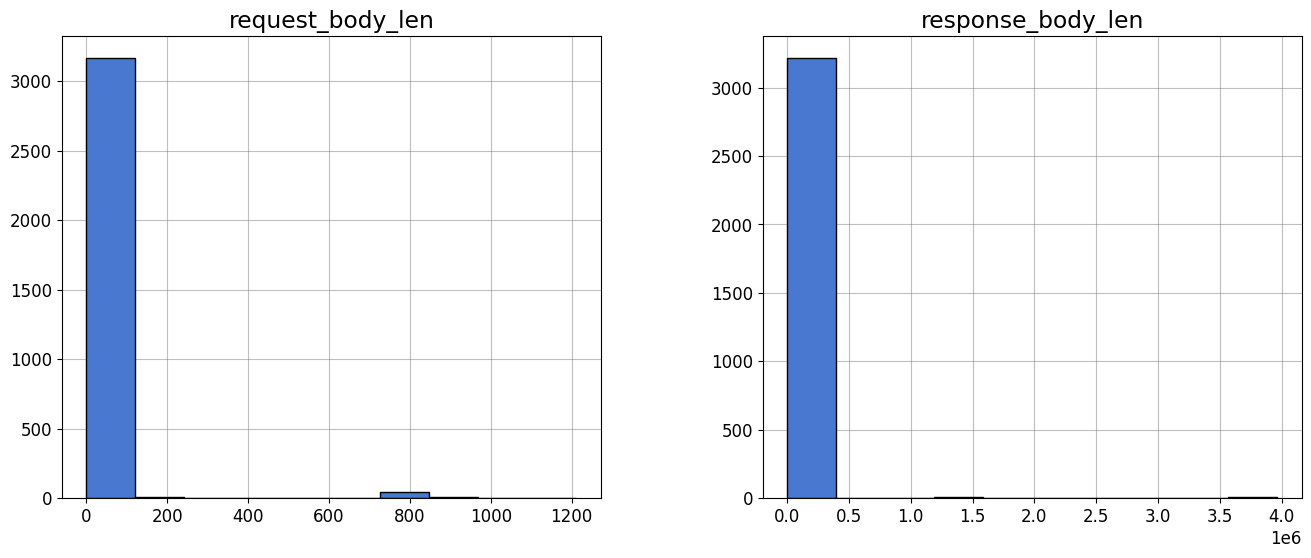

In [75]:
http_df[['request_body_len','response_body_len']].hist()

Text(0.5, 0, 'HTTP Requests per Second')

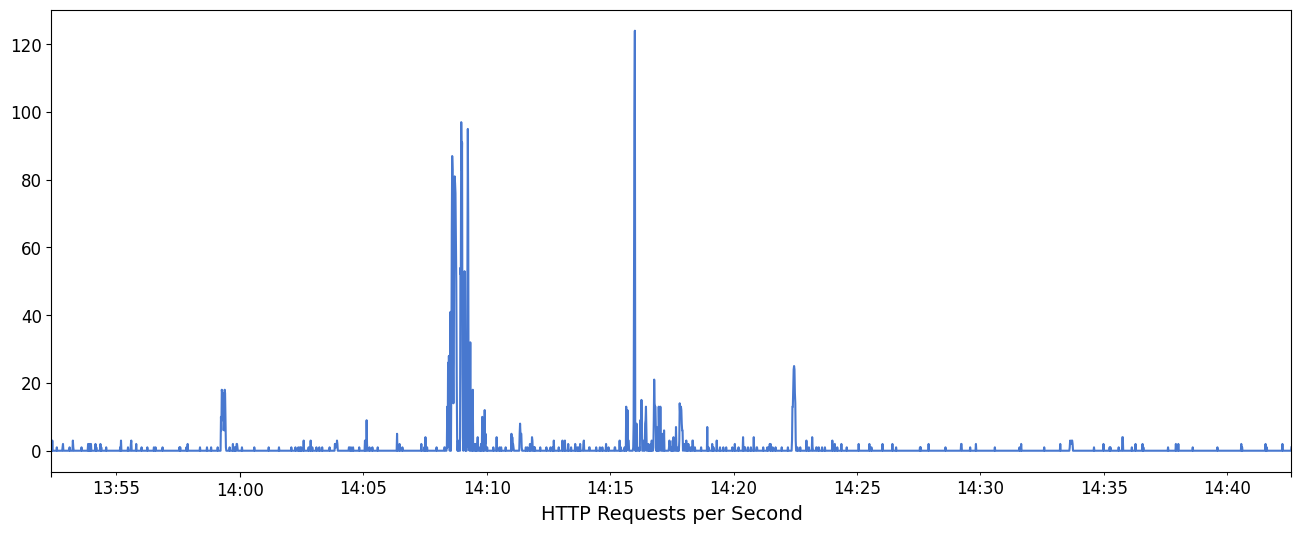

In [76]:
http_df['uid'].resample('1S').count().plot()
plt.xlabel('HTTP Requests per Second')